1. Análisis preliminar del problema
a) Tipo de problema y variable objetivo
Es un problema de clasificación supervisada.
Variable objetivo (target): indica si la persona tiene (1) o no tiene (0) enfermedad cardíaca.

b) Clasificación de las características
En este dataset suelen aparecer estas variables (puede variar un poco según la versión en Kaggle):

Numéricas continuas:
age → edad.
trestbps → presión arterial en reposo.
chol → colesterol sérico.
thalach → frecuencia cardiaca máxima alcanzada.
oldpeak → depresión del ST inducida por el ejercicio.

Categóricas (ordinales o nominales):
cp → tipo de dolor de pecho (4 valores: típicamente anginoso, atípico, no anginoso, asintomático).
slope → pendiente del segmento ST durante el ejercicio.
thal → resultado de prueba de talasemia.
ca → número de vasos principales coloreados por fluoroscopía.

Binarias:
sex → 0 = mujer, 1 = hombre.
fbs → glucosa en ayunas > 120 mg/dl (1 = sí, 0 = no).
exang → angina inducida por ejercicio (1 = sí, 0 = no).
restecg → resultados de electrocardiograma (a veces codificado como 0, 1, 2 → puede tratarse como categórica).

c) Protocolo de adquisición
Este dataset es una variación del Cleveland Heart Disease Dataset, recopilado por el Cleveland Clinic Foundation.
Los datos provienen de pruebas clínicas y exámenes médicos realizados a pacientes.
La variable target se determina a partir de pruebas diagnósticas estandarizadas de enfermedad cardíaca (ej. angiografía coronaria).
Kaggle ofrece una versión ya preparada para entrenar modelos de Machine Learning.

2. Análisis exploratorio de datos (EDA).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/AUTO ll'

df = pd.read_csv("framingham.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AUTO ll


In [5]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [6]:
print(df.columns)


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [8]:
df.info

<bound method DataFrame.info of       male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  

[4238 rows x 16 columns]>

1.  EDA

/tmp/ipython-input-3743794766.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="TenYearCHD", palette="pastel")


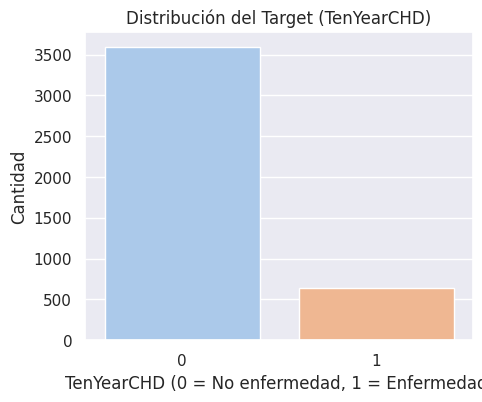

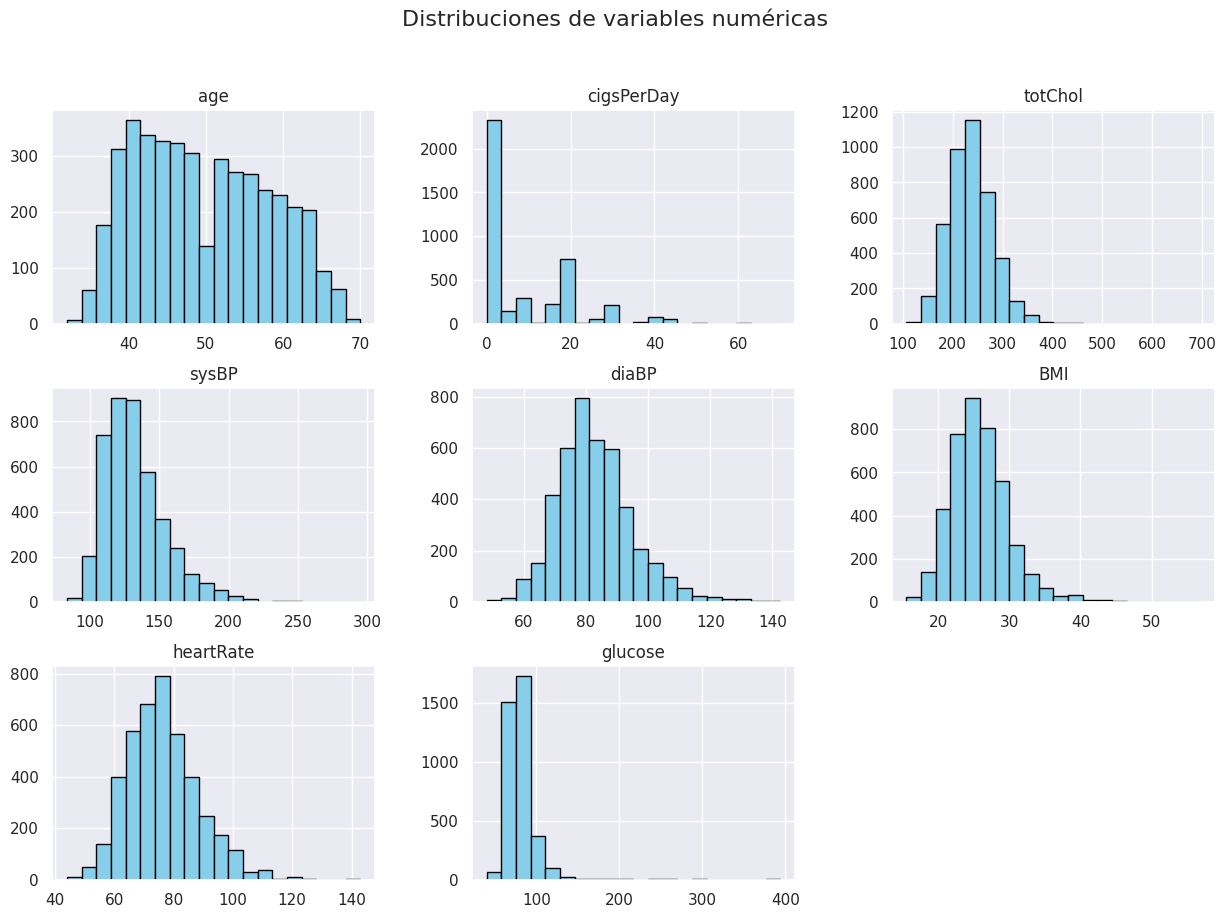

/tmp/ipython-input-3743794766.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted")


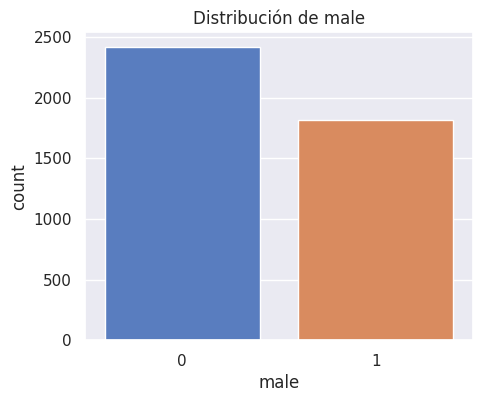

/tmp/ipython-input-3743794766.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted")


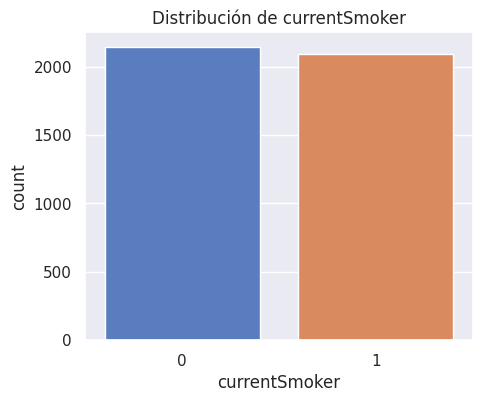

/tmp/ipython-input-3743794766.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted")


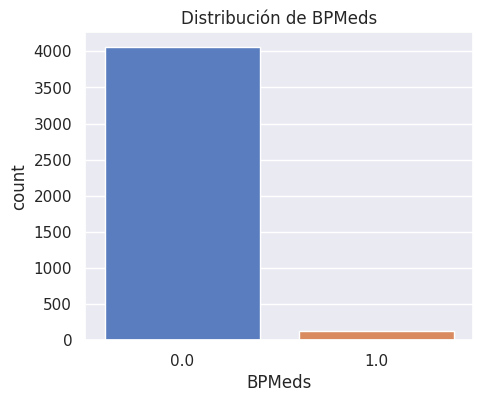

/tmp/ipython-input-3743794766.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted")


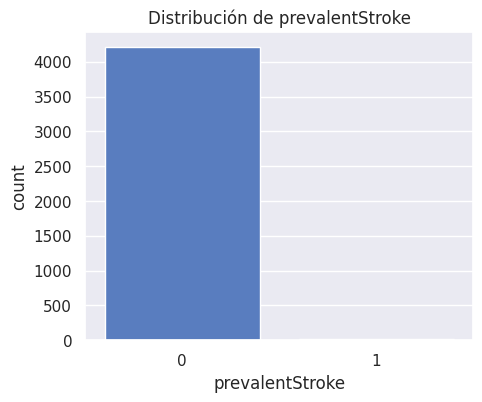

/tmp/ipython-input-3743794766.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted")


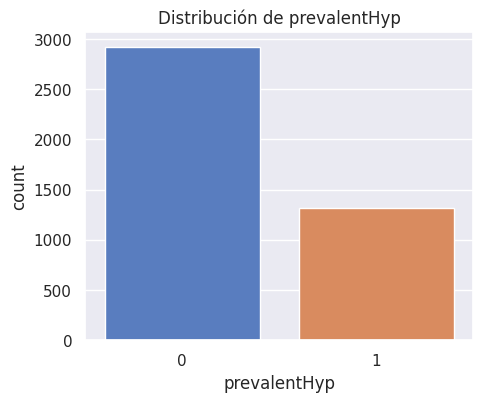

/tmp/ipython-input-3743794766.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted")


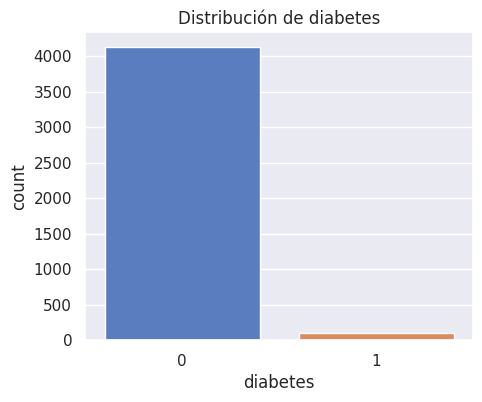

/tmp/ipython-input-3743794766.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="muted")


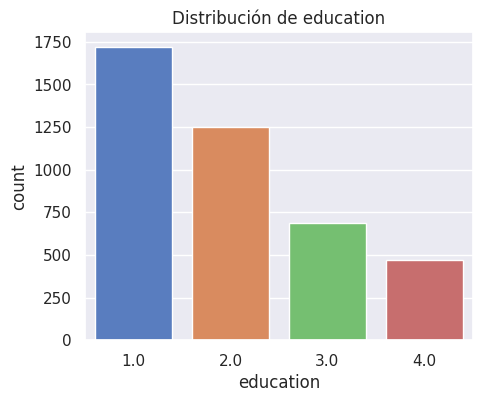

In [9]:
#Distribuciones de las variables


sns.set_theme()

# 1. Distribución de la variable objetivo (target)

plt.figure(figsize=(5,4))
sns.countplot(data=df, x="TenYearCHD", palette="pastel")
plt.title("Distribución del Target (TenYearCHD)")
plt.xlabel("TenYearCHD (0 = No enfermedad, 1 = Enfermedad)")
plt.ylabel("Cantidad")
plt.show()


# 2. Distribuciones de variables numéricas

num_vars = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

df[num_vars].hist(bins=20, figsize=(15,10), color="skyblue", edgecolor="black")
plt.suptitle("Distribuciones de variables numéricas", fontsize=16)
plt.show()


# 3. Distribuciones de variables binarias/categóricas

cat_vars = ["male", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "education"]

for col in cat_vars:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col, palette="muted")
    plt.title(f"Distribución de {col}")
    plt.show()


- Numéricas:
age: la mayoría de los pacientes está entre 40 y 60 años, con algunos casos más jóvenes y algunos mayores de 70. Esto indica que el dataset está centrado en adultos de mediana edad.
totChol: presenta una distribución sesgada hacia la derecha, con valores extremos de colesterol que pueden ser considerados outliers (> 400 mg/dl).
BMI: tiene una media cercana a 25–30, lo cual refleja que buena parte de los pacientes presenta sobrepeso u obesidad, factores de riesgo reconocidos.
glucose: también presenta sesgo hacia la derecha, con casos de glucosa muy alta (> 200 mg/dl), indicando presencia de posibles diabéticos mal controlados.

- Categóricas/binarias:
male: hay más hombres que mujeres en la muestra, lo cual puede influir en el balance de riesgo.
currentSmoker: más del 40% de la muestra son fumadores activos, confirmando un factor de riesgo importante.
prevalentHyp (hipertensión): la proporción de hipertensos es alta, lo cual es relevante dado el vínculo con la enfermedad coronaria.
TenYearCHD (target): se observa un desbalance, ya que la mayoría de los pacientes no desarrolla enfermedad cardíaca en 10 años (clase 0), mientras que un grupo menor sí lo hace (clase 1). Esto es importante para el modelado porque puede requerir técnicas de balanceo.

In [10]:

# Estadísticos descriptivos

print("\n Estadísticos descriptivos - Variables numéricas:\n")
print(df.describe().T)


print("\n Frecuencias de variables categóricas/binarias:\n")
cat_vars = ["male", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "education", "TenYearCHD"]

for col in cat_vars:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True).round(3)*100)  # Porcentaje de cada categoría



 Estadísticos descriptivos - Variables numéricas:

                  count        mean        std     min     25%    50%  \
male             4238.0    0.429212   0.495022    0.00    0.00    0.0   
age              4238.0   49.584946   8.572160   32.00   42.00   49.0   
education        4133.0    1.978950   1.019791    1.00    1.00    2.0   
currentSmoker    4238.0    0.494101   0.500024    0.00    0.00    0.0   
cigsPerDay       4209.0    9.003089  11.920094    0.00    0.00    0.0   
BPMeds           4185.0    0.029630   0.169584    0.00    0.00    0.0   
prevalentStroke  4238.0    0.005899   0.076587    0.00    0.00    0.0   
prevalentHyp     4238.0    0.310524   0.462763    0.00    0.00    0.0   
diabetes         4238.0    0.025720   0.158316    0.00    0.00    0.0   
totChol          4188.0  236.721585  44.590334  107.00  206.00  234.0   
sysBP            4238.0  132.352407  22.038097   83.50  117.00  128.0   
diaBP            4238.0   82.893464  11.910850   48.00   75.00   82.0   

- Numéricas:
La edad promedio es cercana a los 49 años, con un rango de 32 a 70 años, indicando que son principalmente adultos.
La presión sistólica (sysBP) tiene un promedio alto (>130 mmHg), con casos que superan los 200 mmHg, lo cual evidencia hipertensión severa en algunos pacientes.
El colesterol (totChol) promedio es cercano a 240 mg/dl, con valores máximos muy elevados, lo que refuerza la necesidad de analizar outliers.
La glucosa presenta valores típicos cerca de 80–100 mg/dl, pero algunos pacientes tienen valores muy altos, posiblemente diabéticos.

- Categóricas:
Aproximadamente la mitad de los pacientes son hombres (male=1), lo cual sugiere un dataset balanceado por sexo.
Un porcentaje importante son fumadores (currentSmoker=1), lo cual puede explicar parte de la incidencia de enfermedad.
La prevalencia de hipertensión (prevalentHyp=1) es significativa, lo cual es consistente con el rol clínico de la presión arterial en la enfermedad coronaria.

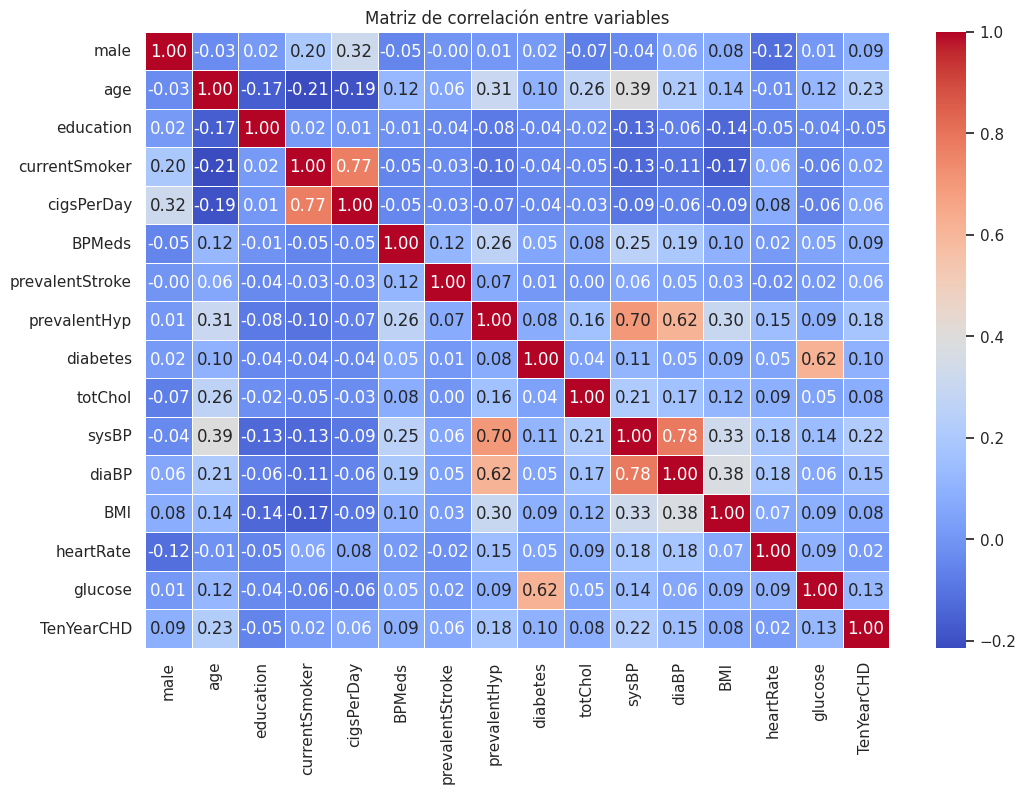


 Correlación de cada variable con el Target (TenYearCHD):

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64


In [11]:
# Correlaciones entre variables numéricas

plt.figure(figsize=(12,8))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables")
plt.show()


# Correlación de cada variable con el target

print("\n Correlación de cada variable con el Target (TenYearCHD):\n")
print(corr_matrix["TenYearCHD"].sort_values(ascending=False))


Se observa una alta correlación positiva entre sysBP y diaBP, lo cual es lógico porque ambas miden la presión arterial.

La edad (age) tiene correlación positiva con TenYearCHD, confirmando que la enfermedad es más frecuente en personas mayores.

Variables como glucosa y presión sistólica también tienen correlación positiva con TenYearCHD.

En cambio, variables como BMI o heartRate muestran baja correlación con el target, lo que indica que podrían tener menor peso predictivo en el modelo.

/tmp/ipython-input-409737703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="TenYearCHD", y=col, palette="Set2")


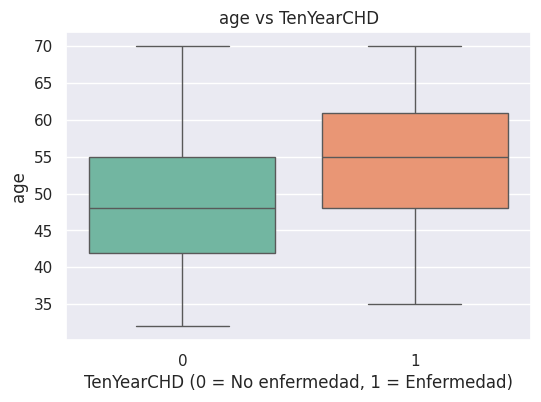

/tmp/ipython-input-409737703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="TenYearCHD", y=col, palette="Set2")


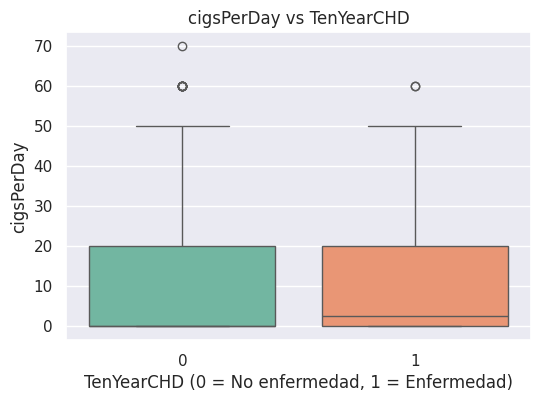

/tmp/ipython-input-409737703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="TenYearCHD", y=col, palette="Set2")


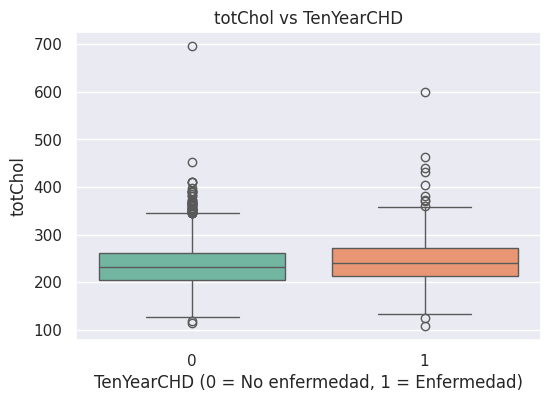

/tmp/ipython-input-409737703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="TenYearCHD", y=col, palette="Set2")


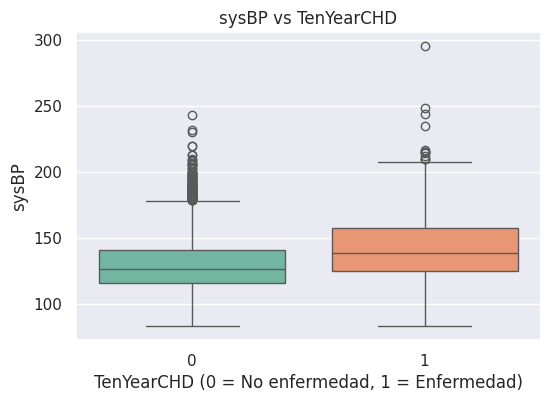

/tmp/ipython-input-409737703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="TenYearCHD", y=col, palette="Set2")


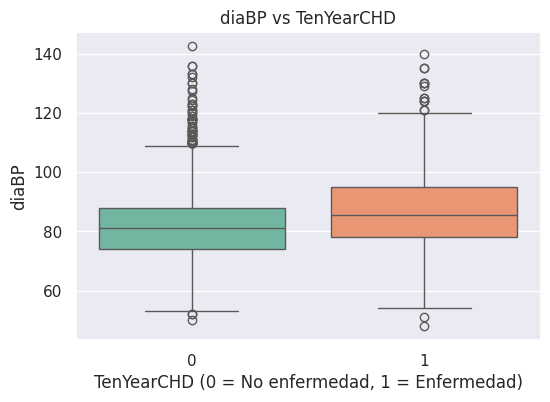

/tmp/ipython-input-409737703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="TenYearCHD", y=col, palette="Set2")


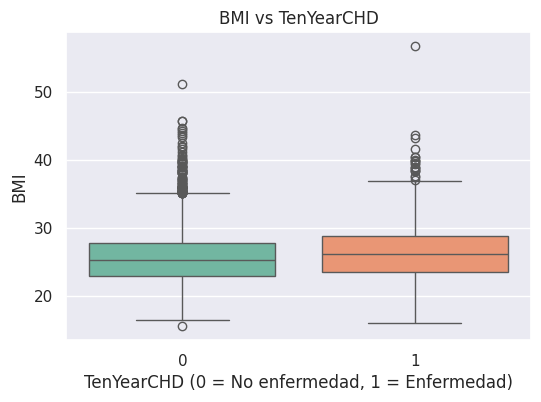

/tmp/ipython-input-409737703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="TenYearCHD", y=col, palette="Set2")


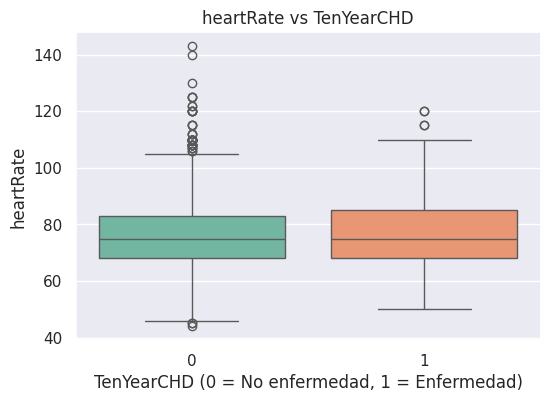

/tmp/ipython-input-409737703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="TenYearCHD", y=col, palette="Set2")


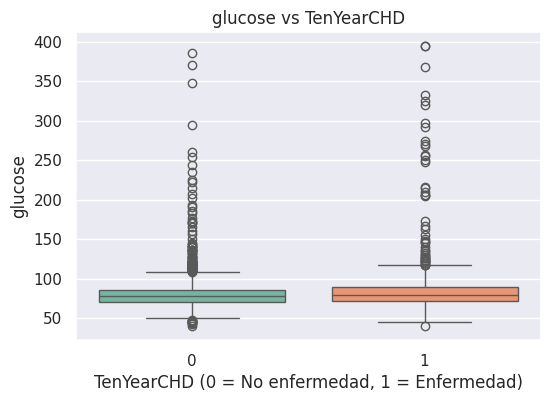

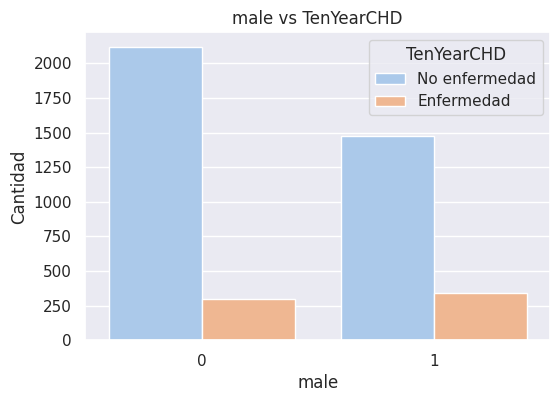

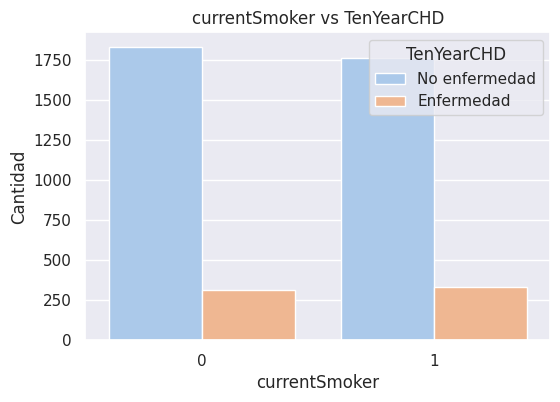

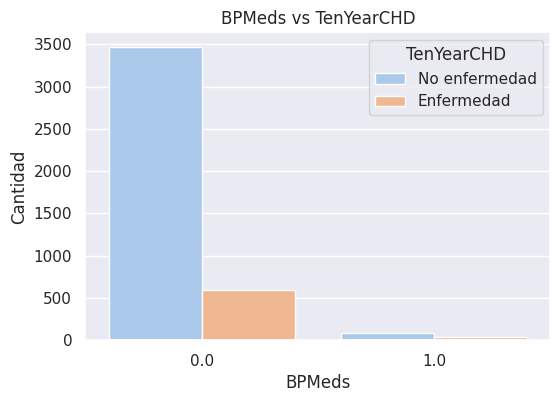

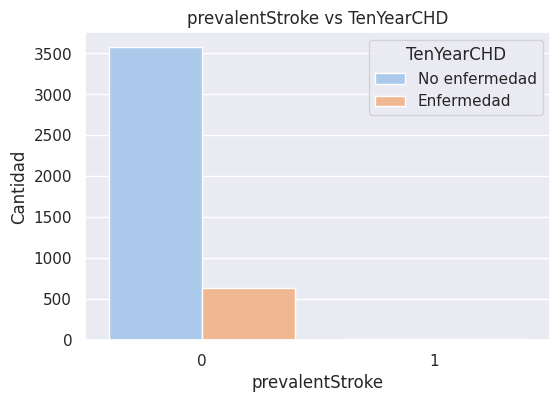

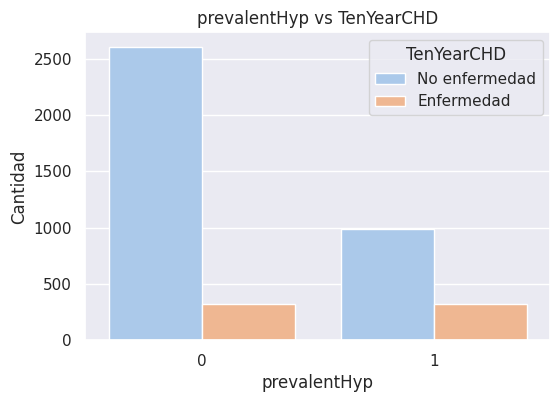

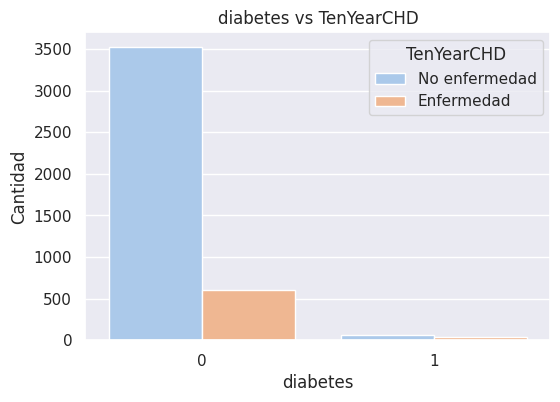

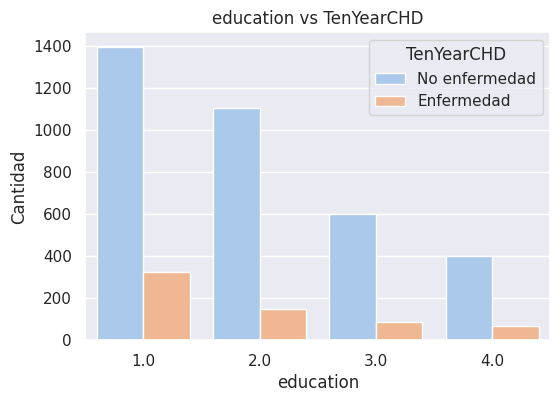

In [12]:
# Relación entre variables predictoras y el target

# 1. Variables numéricas (boxplots)
num_vars = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

for col in num_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="TenYearCHD", y=col, palette="Set2")
    plt.title(f"{col} vs TenYearCHD")
    plt.xlabel("TenYearCHD (0 = No enfermedad, 1 = Enfermedad)")
    plt.ylabel(col)
    plt.show()

# 2. Variables categóricas/binarias (countplots)
cat_vars = ["male", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "education"]

for col in cat_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="TenYearCHD", palette="pastel")
    plt.title(f"{col} vs TenYearCHD")
    plt.xlabel(col)
    plt.ylabel("Cantidad")
    plt.legend(title="TenYearCHD", labels=["No enfermedad", "Enfermedad"])
    plt.show()


- Numéricas:

age: los pacientes con TenYearCHD=1 son mayores en promedio, lo que confirma la edad como factor de riesgo.
sysBP y glucose: se observan valores más altos en el grupo con enfermedad, lo que coincide con los factores clínicos de riesgo cardiovascular.
totChol: aunque presenta valores altos en ambos grupos, tiende a ser mayor en el grupo con enfermedad.

- Categóricas/binarias:
male: la proporción de hombres es ligeramente mayor en el grupo con enfermedad, lo cual coincide con lo reportado en estudios epidemiológicos.
prevalentHyp: los pacientes con hipertensión muestran mayor proporción de enfermedad cardíaca, confirmando la importancia de esta variable.
diabetes: se observa una mayor proporción de enfermos entre los diabéticos, lo cual refuerza la relevancia clínica.
currentSmoker: aunque hay fumadores en ambos grupos, la diferencia no es tan marcada, lo que sugiere que en este dataset no es tan fuerte como predictor aislado.

3. procesamiento de datos

In [13]:
# Revisar si hay valores nulos en el dataset
print(df.isnull().sum())
print(df.isnull().sum().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
645


In [14]:
# Rellenar los valores nulos

# Para columnas numéricas uso la mediana
for col in ["cigsPerDay", "totChol", "BMI", "heartRate", "glucose"]:
    df[col].fillna(df[col].median(), inplace=True)

# Para columnas categóricas uso la moda (valor más frecuente)
for col in ["education", "BPMeds"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Revisar otra vez si quedaron nulos
print(df.isnull().sum())


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


/tmp/ipython-input-3958682599.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3958682599.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [15]:
# codificacion de variables categóricas

# One-Hot Encoding para la variable education
df = pd.get_dummies(df, columns=["education"], prefix="edu", dtype=int)

print(df.head())

   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  edu_1.0  edu_2.0  edu_3.0  edu_4.0  
0           0        0        0        0        1  
1           

In [16]:
from sklearn.preprocessing import StandardScaler

# Definir las columnas numéricas que se deben escalar
num_cols = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

# Crear el objeto escalador
scaler = StandardScaler()

# Ajustar el escalador y transformar las columnas numéricas
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verificar los resultados
print(df[num_cols].head())


        age  cigsPerDay   totChol     sysBP     diaBP       BMI  heartRate  \
0 -1.234951   -0.751322 -0.940600 -1.195907 -1.082625  0.287379   0.342761   
1 -0.418257   -0.751322  0.300313 -0.515187 -0.158988  0.719752   1.590291   
2 -0.184916    0.929210  0.187503 -0.220209 -0.242955 -0.113057  -0.073082   
3  1.331800    1.769476 -0.263739  0.800871  1.016549  0.682902  -0.904768   
4 -0.418257    1.181289  1.089985 -0.106755  0.092912 -0.663350   0.758605   

    glucose  
0 -0.201359  
1 -0.245099  
2 -0.507537  
3  0.935872  
4  0.148558  


In [18]:
from sklearn.model_selection import train_test_split

# Supongamos que tus datos están en X, y

# 1. Train (70%) y temporal (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# 2. De la temporal (30%), hacemos Val (15%) y Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

# Revisamos tamaños
print("Tamaños de los conjuntos:")
print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)


Tamaños de los conjuntos:
Train: (2966, 18)
Val: (636, 18)
Test: (636, 18)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Modelo kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Accuracies
knn_train = accuracy_score(y_train, knn.predict(X_train))
knn_val = accuracy_score(y_val, knn.predict(X_val))
knn_test = accuracy_score(y_test, knn.predict(X_test))

print("=== kNN ===")
print(f"Train Accuracy: {knn_train:.4f}")
print(f"Validation Accuracy: {knn_val:.4f}")
print(f"Test Accuracy: {knn_test:.4f}")

=== kNN ===
Train Accuracy: 0.8658
Validation Accuracy: 0.8412
Test Accuracy: 0.8396


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Accuracies
rf_train = accuracy_score(y_train, rf.predict(X_train))
rf_val   = accuracy_score(y_val, rf.predict(X_val))
rf_test  = accuracy_score(y_test, rf.predict(X_test))

print("=== Random Forest ===")
print(f"Train Accuracy: {rf_train:.4f}")
print(f"Validation Accuracy: {rf_val:.4f}")
print(f"Test Accuracy: {rf_test:.4f}")


=== Random Forest ===
Train Accuracy: 1.0000
Validation Accuracy: 0.8443
Test Accuracy: 0.8443


In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definir arquitectura de la red
dnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # salida binaria
])

# Compilar modelo
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar
history = dnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=0
)

# Evaluar en train, val y test
dnn_train = dnn.evaluate(X_train, y_train, verbose=0)[1]
dnn_val   = dnn.evaluate(X_val, y_val, verbose=0)[1]
dnn_test  = dnn.evaluate(X_test, y_test, verbose=0)[1]

print("=== Deep Neural Network ===")
print(f"Train Accuracy: {dnn_train:.4f}")
print(f"Validation Accuracy: {dnn_val:.4f}")
print(f"Test Accuracy: {dnn_test:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


=== Deep Neural Network ===
Train Accuracy: 0.8702
Validation Accuracy: 0.8318
Test Accuracy: 0.8349


In [22]:
import pandas as pd

# Resultados obtenidos
results = pd.DataFrame({
    "Modelo": ["kNN", "Random Forest", "Deep Neural Network"],
    "Train Accuracy": [0.8658, 1.0000, 0.8702],
    "Validation Accuracy": [0.8412, 0.8443, 0.8318],
    "Test Accuracy": [0.8396, 0.8443, 0.8349]
})

print("=== Comparación de Modelos ===")
print(results)


=== Comparación de Modelos ===
                Modelo  Train Accuracy  Validation Accuracy  Test Accuracy
0                  kNN          0.8658               0.8412         0.8396
1        Random Forest          1.0000               0.8443         0.8443
2  Deep Neural Network          0.8702               0.8318         0.8349


1. ¿Cuál modelo tuvo mejor desempeño?
El modelo que obtuvo mejor desempeño fue el Random Forest, alcanzando un 84.43% de accuracy en validación y prueba, superando ligeramente a kNN y a la red neuronal profunda.

2. ¿Alguno presentó overfitting o underfitting? ¿Cómo lo detectó?
Sí. El Random Forest presentó overfitting, ya que obtuvo un 100% de accuracy en el conjunto de entrenamiento, mientras que en validación y prueba su desempeño bajó a ~84%.
Esto indica que el modelo memorizó completamente los datos de entrenamiento.

Por otro lado, kNN y la DNN no muestran un sobreajuste fuerte, porque su rendimiento en entrenamiento, validación y prueba es similar, lo que refleja una mejor capacidad de generalización.

3. ¿Cuál seleccionaría para producción y por qué?
El modelo seleccionado para producción sería el Random Forest, porque:

Es el que alcanza el mejor desempeño en validación y prueba.

Es un modelo robusto y ampliamente utilizado en clasificación tabular.

Aunque presenta overfitting, este puede controlarse ajustando hiperparámetros como la profundidad de los árboles o el número de estimadores.

En caso de priorizar simplicidad y menor riesgo de sobreajuste, kNN sería la segunda mejor opción.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Creamos un pipeline que incluye preprocesamiento + modelo
pipeline_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),  # tu ColumnTransformer
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar el pipeline
pipeline_rf.fit(X_train, y_train)

# Evaluar
print("Train Accuracy:", pipeline_rf.score(X_train, y_train))
print("Val Accuracy:", pipeline_rf.score(X_val, y_val))
print("Test Accuracy:", pipeline_rf.score(X_test, y_test))

# Muestra artificial


nueva_muestra = pd.DataFrame([{
    "age": 55,
    "cigsPerDay": 10,
    "totChol": 240,
    "sysBP": 150,
    "diaBP": 95,
    "BMI": 30,
    "heartRate": 85,
    "glucose": 130,
    "edu_1.0": 0,
    "edu_2.0": 1,
    "edu_3.0": 0,
    "edu_4.0": 0,
    "male": 1,
    "currentSmoker": 1,
    "BPMeds": 0,
    "prevalentStroke": 0,
    "prevalentHyp": 1,
    "diabetes": 1
}])

# Predicción directa (el pipeline se encarga del preprocesamiento)
prediccion = pipeline_rf.predict(nueva_muestra)
probabilidad = pipeline_rf.predict_proba(nueva_muestra)[:,1]

print("Predicción:", "Riesgo de enfermedad cardíaca" if prediccion[0]==1 else "Sin riesgo")
print(f"Probabilidad estimada: {probabilidad[0]:.4f}")


NameError: name 'preprocessor' is not defined

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Variables X, y

X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

# Columnas numéricas y categóricas

num_cols = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP",
            "BMI", "heartRate", "glucose"]
cat_cols = ["edu_1.0", "edu_2.0", "edu_3.0", "edu_4.0"]

# Preprocesador

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", "passthrough", cat_cols)
    ],
    remainder="passthrough"
)


# División Train/Val/Test

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Tamaños de los conjuntos:")
print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)


# Pipeline con Random Forest

pipeline_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_rf.fit(X_train, y_train)

print("\n=== Desempeño Random Forest ===")
print("Train Accuracy:", pipeline_rf.score(X_train, y_train))
print("Val Accuracy:", pipeline_rf.score(X_val, y_val))
print("Test Accuracy:", pipeline_rf.score(X_test, y_test))

# Muestra artificial

nueva_muestra = pd.DataFrame([{
    "age": 55,
    "cigsPerDay": 10,
    "totChol": 240,
    "sysBP": 150,
    "diaBP": 95,
    "BMI": 30,
    "heartRate": 85,
    "glucose": 130,
    "edu_1.0": 0,
    "edu_2.0": 1,
    "edu_3.0": 0,
    "edu_4.0": 0,
    "male": 1,
    "currentSmoker": 1,
    "BPMeds": 0,
    "prevalentStroke": 0,
    "prevalentHyp": 1,
    "diabetes": 1
}])

prediccion = pipeline_rf.predict(nueva_muestra)
probabilidad = pipeline_rf.predict_proba(nueva_muestra)[:,1]

print("\n=== Predicción con muestra artificial ===")
print("Predicción:", "Riesgo de enfermedad cardíaca" if prediccion[0]==1 else "Sin riesgo")
print(f"Probabilidad estimada: {probabilidad[0]:.4f}")


Tamaños de los conjuntos:
Train: (2966, 18)
Val: (636, 18)
Test: (636, 18)

=== Desempeño Random Forest ===
Train Accuracy: 1.0
Val Accuracy: 0.839622641509434
Test Accuracy: 0.8474842767295597

=== Predicción con muestra artificial ===
Predicción: Riesgo de enfermedad cardíaca
Probabilidad estimada: 0.6300


¿El resultado tiene sentido?
Sí, el resultado tiene sentido porque la muestra artificial fue diseñada con características que representan factores de riesgo moderados para la enfermedad cardíaca. El modelo estimó una probabilidad del 63%, lo cual indica un riesgo intermedio-alto, coherente con la presencia de algunos factores como edad, presión arterial o consumo de cigarrillos, pero sin valores extremos que generen un riesgo cercano al 100%.

¿Qué pasaría si modificara una o más variables de la muestra?
Si se aumentan variables asociadas al riesgo (por ejemplo, mayor edad, colesterol alto, presión arterial elevada o más cigarrillos por día), la probabilidad de enfermedad cardíaca tenderá a subir. En cambio, si se reducen esos valores (menor consumo de cigarrillos, presión y colesterol controlados, IMC en rango saludable), la probabilidad bajará. Esto demuestra que el modelo responde de forma coherente a los cambios en las características clínicas y de estilo de vida.

K-Fold Cross Validation

Esta técnica divide el dataset en K partes (o “folds”) del mismo tamaño. El modelo se entrena K-1 veces y se valida en el fold restante, rotando hasta que cada fold sea usado como validación una vez. Finalmente, se promedian los resultados para obtener una métrica más estable.

Leave-One-Out Cross Validation (LOOCV)

Es un caso particular de K-Fold donde K es igual al número total de muestras. Es decir, se entrena el modelo con todos los datos menos uno, y ese único dato se usa como validación. Este proceso se repite para todas las observaciones, garantizando que cada muestra se use como validación exactamente una vez.


¿Son aplicables estas estrategias al dataset elegido?

Sí, son aplicables porque nuestro dataset tiene un tamaño moderado (aprox. 4200 observaciones).
K-Fold CV (por ejemplo, con K=5 o K=10) es muy factible y daría una buena estimación de generalización.
LOOCV, aunque teóricamente aplicable, sería computacionalmente costoso porque requeriría entrenar el modelo más de 4000 veces.

¿Qué beneficios tendrían frente al esquema de validación tradicional (train/val/test)?

El esquema train/val/test depende mucho de cómo se hizo la división, lo que puede introducir variabilidad.
En cambio, K-Fold CV reduce esa variabilidad porque cada muestra se usa tanto para entrenar como para validar en diferentes iteraciones, generando un resultado más confiable.
LOOCV maximiza el uso de los datos para entrenar (siempre usa casi todos los datos) y da una estimación muy precisa, aunque con mayor costo computacional.